Midterm Skills Exam (2nd Sem 2024)

Instructions:
For this part of the exam, answer the given questions in a jupyter notebook. All of the questions must be answered locally, through a brief explanation and Python code. 
Students are not allowed to look at any external references.

1. Define an ETL pipeline. In your own words, explain the purpose of each component: Extract, Transform, and Load.

An ETL pipeline is a method to clean or filter a dataset from inputs that are irrelevant to the topic. The components of ETL pipeline are: <br>
- Extract, it is to get the dataset by running it into the program. It is the initial step before the dataset is cleaned.
- Transform, it is to clean the data from inputs that are irrelevant to the topic, such as dropping duplicated table and removing entries that are "N/A".
- Load, it is to run cleaned or filtered dataset, or in short the output from the process of transformation.

2. Define an ETL pipeline. In your own words, explain the purpose of each component: Extract, Transform, and Load.

An ETL pipeline is a method to clean or filter a dataset from inputs that are irrelevant to the topic. The components of ETL pipeline are: <br>
- Extract, it is to get the dataset by running it into the program. It is the initial step before the dataset is cleaned.
- Transform, it is to clean the data from inputs that are irrelevant to the topic, such as dropping duplicated table and removing entries that are "N/A".
- Load, it is to run cleaned or filtered dataset, or in short the output from the process of transformation.

3. Identify at least two potential data quality issues that might be present in the provided fake data.

In [1]:
import pandas as pd

In [2]:
sales = pd.read_csv("sales_data_raw.csv")
sales = pd.DataFrame(sales)
customers = pd.read_csv("customers_data.json")
customers = pd.DataFrame(customers)

In [3]:
# There are no N/As.
sales.isna().any()

TransactionID      False
CustomerID         False
TransactionDate    False
Product            False
Quantity           False
Price              False
Discount           False
dtype: bool

In [4]:
# There are no duplicates.
sales.duplicated().any()

False

In [5]:
# The TransactionDate is in wrong data type, it must be in datatime data type.
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    10 non-null     object 
 1   CustomerID       10 non-null     object 
 2   TransactionDate  10 non-null     object 
 3   Product          10 non-null     object 
 4   Quantity         10 non-null     int64  
 5   Price            10 non-null     int64  
 6   Discount         10 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 692.0+ bytes


In [6]:
# The TransactionDate is in string form (object), it must be converted to datatime data type.
sales["TransactionDate"] = sales["TransactionDate"].apply(pd.to_datetime)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    10 non-null     object        
 1   CustomerID       10 non-null     object        
 2   TransactionDate  10 non-null     datetime64[ns]
 3   Product          10 non-null     object        
 4   Quantity         10 non-null     int64         
 5   Price            10 non-null     int64         
 6   Discount         10 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 692.0+ bytes


In [7]:
# There is no proper index value
sales

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount
0,T001,C001,2023-01-01,Widget,2,10,0.00
1,T002,C002,2023-01-05,Gadget,1,20,0.10
2,T003,C003,2023-01-07,Widget,3,10,0.00
3,T004,C002,2023-01-10,Gizmo,5,15,0.05
4,T005,C001,2023-01-12,Widget,1,10,0.00
5,T006,C004,2023-01-15,Gadget,2,20,0.20
6,T007,C005,2023-01-18,Widget,4,10,0.00
7,T008,C002,2023-01-20,Gizmo,3,15,0.10
8,T009,C003,2023-01-22,Widget,5,10,0.00
9,T010,C005,2023-01-25,Gadget,3,20,0.15


In [8]:
# The customers table is not in proper table format, It needs to be pivoted.
customers

,,,[
"{""CustomerID"": ""C001""","""Name"": ""Alice""","""JoinDate"": ""2022-12-01""}",NaN
"{""CustomerID"": ""C002""","""Name"": ""Bob""","""JoinDate"": ""2022-11-15""}",NaN
"{""CustomerID"": ""C003""","""Name"": ""Charlie""","""JoinDate"": ""2023-01-05""}",NaN
"{""CustomerID"": ""C004""","""Name"": ""Diana""","""JoinDate"": ""2023-01-10""}",NaN
"{""CustomerID"": ""C005""","""Name"": ""Evan""","""JoinDate"": ""2023-01-20""}",NaN
],NaN,NaN,NaN


4. How would you transform the TransactionDate in the sales data and the JoinDate in the customer data into proper datetime objects using Pandas?

In [9]:
# To transfrom the TransactionDate to datetime using pandas, "pd.to_datetime(column name)"
pd.to_datetime(sales["TransactionDate"])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    10 non-null     object        
 1   CustomerID       10 non-null     object        
 2   TransactionDate  10 non-null     datetime64[ns]
 3   Product          10 non-null     object        
 4   Quantity         10 non-null     int64         
 5   Price            10 non-null     int64         
 6   Discount         10 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 692.0+ bytes


In [10]:
sales

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount
0,T001,C001,2023-01-01,Widget,2,10,0.00
1,T002,C002,2023-01-05,Gadget,1,20,0.10
2,T003,C003,2023-01-07,Widget,3,10,0.00
3,T004,C002,2023-01-10,Gizmo,5,15,0.05
4,T005,C001,2023-01-12,Widget,1,10,0.00
5,T006,C004,2023-01-15,Gadget,2,20,0.20
6,T007,C005,2023-01-18,Widget,4,10,0.00
7,T008,C002,2023-01-20,Gizmo,3,15,0.10
8,T009,C003,2023-01-22,Widget,5,10,0.00
9,T010,C005,2023-01-25,Gadget,3,20,0.15


Final Transaction Amount = (Quantity × Price) × (1 – Discount) <br>5. 
Write a function to calculate the final transaction amount given the columns Quantity, Price, and Discount.

In [11]:
# Use simple arithmethic computation of each columns as instructed and that is "(Quantity × Price) × (1 – Discount)"
sales["Final Transaction Amount"] = (sales["Quantity"]*sales["Price"]) * (1 - sales["Discount"])
sales

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount,Final Transaction Amount
0,T001,C001,2023-01-01,Widget,2,10,0.00,20.00
1,T002,C002,2023-01-05,Gadget,1,20,0.10,18.00
2,T003,C003,2023-01-07,Widget,3,10,0.00,30.00
3,T004,C002,2023-01-10,Gizmo,5,15,0.05,71.25
4,T005,C001,2023-01-12,Widget,1,10,0.00,10.00
5,T006,C004,2023-01-15,Gadget,2,20,0.20,32.00
6,T007,C005,2023-01-18,Widget,4,10,0.00,40.00
7,T008,C002,2023-01-20,Gizmo,3,15,0.10,40.50
8,T009,C003,2023-01-22,Widget,5,10,0.00,50.00
9,T010,C005,2023-01-25,Gadget,3,20,0.15,51.00


6. Explain how you would join the sales data with the customer data. Which column is the appropriate key to use?

In [12]:
combined = sales.concat([customers])

AttributeError: 'DataFrame' object has no attribute 'concat'

7. What method in Pandas would you use to identify and remove duplicate rows in the sales data?

In [13]:
# With the ".any()" function, it determines whether there are data that are duplicated with ".duplicated()" function
sales.duplicated().any() # It is False, because there are no duplicated datas

False

In [14]:
# to drop or remove duplicate rows in the sales data, use ".drop_duplicates()"
sales.drop_duplicates() # There were no rows dropped or removed, because there are no duplicated datas

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount,Final Transaction Amount
0,T001,C001,2023-01-01,Widget,2,10,0.00,20.00
1,T002,C002,2023-01-05,Gadget,1,20,0.10,18.00
2,T003,C003,2023-01-07,Widget,3,10,0.00,30.00
3,T004,C002,2023-01-10,Gizmo,5,15,0.05,71.25
4,T005,C001,2023-01-12,Widget,1,10,0.00,10.00
5,T006,C004,2023-01-15,Gadget,2,20,0.20,32.00
6,T007,C005,2023-01-18,Widget,4,10,0.00,40.00
7,T008,C002,2023-01-20,Gizmo,3,15,0.10,40.50
8,T009,C003,2023-01-22,Widget,5,10,0.00,50.00
9,T010,C005,2023-01-25,Gadget,3,20,0.15,51.00


8. After transforming the data, list two different methods you might use to load the data into a target system, including any relevant libraries or functions.

9. Are there other transformations that are necessary to perform on the dataset that were not included so far? List down and perform.

10. What are the visualizations necessary to extract insight from the dataset? Provide a list of these steps, perform and derive the necessary insights.

In [16]:
import matplotlib.pyplot as plt

ConversionError: Failed to convert value(s) to axis units: 0    Widget
1    Gadget
2    Widget
3     Gizmo
4    Widget
5    Gadget
6    Widget
7     Gizmo
8    Widget
9    Gadget
Name: Product, dtype: object

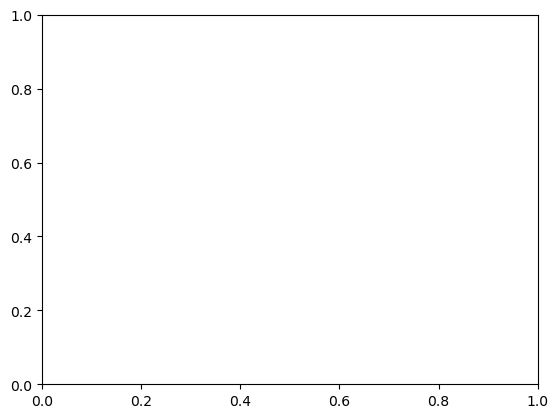

In [19]:
# A visualization that can be extracted from the dataset is to do a histogram
plt.hist(sales["Quantity"], sales["Product"], inplace = True)
plt.show()